In [2635]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
import statsmodels.api as sm

In [2574]:
#Reading dataasets

test = pd.read_csv('test.csv')

train = pd.read_csv('train.csv')

# for merging with predictions at the end
final_test = pd.read_csv('test.csv')

In [2575]:
train.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [2576]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [2577]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [2578]:
test = test.drop(['Alley', 'Pool QC','Id'], axis=1)
train = train.drop(['Alley', 'Pool QC','Id'], axis=1)

In [2579]:
train.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [2580]:
train.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage

In [2581]:
train.isnull().sum().sort_values().tail(30)

Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Bsmt Half Bath       2
Bsmt Full Bath       2
Mas Vnr Area        22
Mas Vnr Type        22
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 2      56
Bsmt Exposure       58
Garage Type        113
Garage Finish      114
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Lot Frontage       330
Fireplace Qu      1000
Fence             1651
Misc Feature      1986
dtype: int64

In [2582]:
basement = train[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF']]

In [2583]:
basement[basement['BsmtFin Type 1'].isnull()].head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In [2584]:
# Replacing NaNs with None for BsmtFin Type 1
train['BsmtFin Type 1'].fillna('None', inplace=True)

# Replacing NaNs with None for BsmtFin Type 2
train['BsmtFin Type 2'].fillna('None', inplace=True)

# Replacing NaNs with 0 for BsmtFin SF 1
train['BsmtFin SF 1'].fillna(0, inplace=True)

# Replacing NaNs with 0 for BsmtFin SF 2
train['BsmtFin SF 2'].fillna(0, inplace=True)

# Replacing NaNs with 0 for Bsmt Unf SF
train['Bsmt Unf SF'].fillna(0, inplace=True)

# Replacing NaNs with 0 for Total Bsmt SF
train['Total Bsmt SF'].fillna(0, inplace=True)

# Replacing NaNs with None for Bsmt Qual
train['Bsmt Qual'].fillna('None', inplace=True)

# Replacing NaNs with None for Bsmt Cond
train['Bsmt Cond'].fillna('None', inplace=True)

# Replacing NaNs with None for Bsmt Exposure
train['Bsmt Exposure'].fillna('None', inplace=True)

# Replacing NaNs with None for Misc Feature
train['Misc Feature'].fillna('None', inplace=True)


In [2585]:
garage = train[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond']]

In [2586]:
garage[garage['Garage Area'].isnull()]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [2587]:
# Average SF of Detached Garage
detchd_sf = train[train['Garage Type']=='Detchd']['Garage Area'].mean()

# Replacing NaNs with mean for Detached Garages
train['Garage Area'].fillna(detchd_sf, inplace=True)

# Checking if NaN for Garage cars correspond with having a garage
train[train['Garage Cars'].isnull()]['Garage Type'].head()

# Average Cars of Detached Garage
detchd_cars = train[train['Garage Type']=='Detchd']['Garage Cars'].mean()

# Replacing NaNs with mean for Detached Cars
train['Garage Cars'].fillna(detchd_cars, inplace=True)



In [2588]:
train.loc[[1712],['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,NaN,NaN,1.558879,419.543925,NaN,NaN


In [2589]:
# Replacing NaNs with None for Garage Type, Garage Finish, Garage Qual, Garage Cond
train['Garage Type'].fillna('None', inplace=True)
train['Garage Finish'].fillna('None', inplace=True)
train['Garage Qual'].fillna('None', inplace=True)
train['Garage Cond'].fillna('None', inplace=True)

# Replacing NaNs with 0 for Garage Yr Blt
train['Garage Yr Blt'].fillna(0, inplace=True)

In [2590]:
# Replacing NaNs with 0 for Mas Vnr Area
train['Mas Vnr Area'].fillna(0, inplace=True)

# Replacing NaNs with None for Garage Yr Blt
train['Mas Vnr Type'].fillna('None', inplace=True)

In [2591]:
# Replacing NaNs with 0 for Bsmt Half Bath, Bsmt Full Bath
train['Bsmt Half Bath'].fillna(0, inplace=True)
train['Bsmt Full Bath'].fillna(0, inplace=True)

In [2592]:
# Replacing NaNs with 0 for Lot Frontage
train['Lot Frontage'].fillna(0, inplace=True)

In [2593]:
# Replacing NaNs with None for Fireplace Qu
train['Fireplace Qu'].fillna('None', inplace=True)

In [2594]:
# Replacing NaNs with None for Fence
train['Fence'].fillna('None', inplace=True)

In [2595]:
train.isnull().sum().sort_values().tail()

Exterior 2nd    0
Exterior 1st    0
Roof Matl       0
Foundation      0
SalePrice       0
dtype: int64

In [2596]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 77 columns):
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof Matl          879 non-null object
Exterior 1st       879 non-null object
Exte

In [2597]:
test.isnull().sum().sort_values().tail(30)

House Style         0
Overall Qual        0
Overall Cond        0
Sale Type           0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Foundation          0
Exter Cond          0
Exterior 2nd        0
Exter Qual          0
Year Built          0
Mas Vnr Type        1
Mas Vnr Area        1
Electrical          1
Bsmt Exposure      25
Bsmt Cond          25
Bsmt Qual          25
BsmtFin Type 2     25
BsmtFin Type 1     25
Garage Type        44
Garage Finish      45
Garage Yr Blt      45
Garage Qual        45
Garage Cond        45
Lot Frontage      160
Fireplace Qu      422
Fence             707
Misc Feature      838
dtype: int64

In [2598]:
# Replacing NaNs with None for Mas Vnr Type, Electrical,Bsmt Exposure,Bsmt Cond, Bsmt Qual,BsmtFin Type 2,BsmtFin Type 1,
# Garage Type,Garage Finish,Garage Qual,Garage Cond,Lot Frontage,Fireplace Qu,Fence, Misc Feature
test['Mas Vnr Type'].fillna('None', inplace=True)
test['Electrical'].fillna('None', inplace=True)
test['Bsmt Exposure'].fillna('None', inplace=True)
test['Bsmt Cond'].fillna('None', inplace=True)
test['Bsmt Qual'].fillna('None', inplace=True)
test['BsmtFin Type 2'].fillna('None', inplace=True)
test['BsmtFin Type 1'].fillna('None', inplace=True)
test['Garage Type'].fillna('None', inplace=True)
test['Garage Finish'].fillna('None', inplace=True)
test['Garage Qual'].fillna('None', inplace=True)
test['Garage Cond'].fillna('None', inplace=True)
test['Fireplace Qu'].fillna('None', inplace=True)
test['Fence'].fillna('None', inplace=True)
test['Misc Feature'].fillna('None', inplace=True)

# Replacing NaNs with 0 for Mas Vnr Area. Garage Yr Blt, Lot Frontage
test['Mas Vnr Area'].fillna(0, inplace=True)
test['Garage Yr Blt'].fillna(0, inplace=True)
test['Lot Frontage'].fillna(0, inplace=True)

In [2599]:
test.isnull().sum().sort_values().tail()

Exterior 1st    0
Roof Matl       0
Roof Style      0
Exter Cond      0
Sale Type       0
dtype: int64

In [2600]:
# changing all numeric columns to floats

columns_numeric = train._get_numeric_data().columns
train[columns_numeric]=train[columns_numeric].astype(float)

columns_numeric2 = test._get_numeric_data().columns
test[columns_numeric2]=test[columns_numeric2].astype(float)

In [2601]:
# checking if 1st Flr SF + 2nd Flr SF = Gr Liv Area ---> Yes
test[['1st Flr SF','2nd Flr SF','Gr Liv Area']].head()

,1st Flr SF,2nd Flr SF,Gr Liv Area
0,908.0,1020.0,1928.0
1,1967.0,0.0,1967.0
2,664.0,832.0,1496.0
3,968.0,0.0,968.0
4,1394.0,0.0,1394.0


In [2602]:
# drop individual basment area columns as Total Bsmt SF exists, also drop 1st Flr SF & 2nd Flr SF
test = test.drop(['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','1st Flr SF','2nd Flr SF'], axis=1)
train = train.drop(['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','1st Flr SF','2nd Flr SF'], axis=1)

#combine total bathrooms
test['Total Full Bath'] = test['Bsmt Full Bath']+test['Full Bath']
train['Total Half Bath'] = train['Bsmt Half Bath']+train['Half Bath']
test = test.drop(['Bsmt Full Bath', 'Full Bath','Bsmt Half Bath','Half Bath'], axis=1)
train = train.drop(['Bsmt Full Bath', 'Full Bath','Bsmt Half Bath','Half Bath'], axis=1)

#combine porch area
test['Porch SF'] = test['Open Porch SF']+test['Enclosed Porch']+test['3Ssn Porch']+test['Screen Porch']
train['Porch SF'] = train['Open Porch SF']+train['Enclosed Porch']+train['3Ssn Porch']+train['Screen Porch']
test = test.drop(['Open Porch SF', 'Enclosed Porch','3Ssn Porch','Screen Porch'], axis=1)
train = train.drop(['Open Porch SF', 'Enclosed Porch','3Ssn Porch','Screen Porch'], axis=1)                                                                    

In [2603]:
# changing Utitlities value to numbers
train['Utilities'] = train['Utilities'].replace('AllPub', 4.)
train['Utilities'] = train['Utilities'].replace('NoSewr', 3.)
train['Utilities'] = train['Utilities'].replace('NoSeWa', 2.)
train['Utilities'] = train['Utilities'].replace('ELO', 1.)

test['Utilities'] = test['Utilities'].replace('AllPub', 4.)
test['Utilities'] = test['Utilities'].replace('NoSewr', 3.)
test['Utilities'] = test['Utilities'].replace('NoSeWa', 2.)
test['Utilities'] = test['Utilities'].replace('ELO', 1.)


# changing string columns to numeric columns
train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('Ex', 5.)
train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('Gd', 4.)
train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('TA', 3.)
train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('Fa', 2.)
train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('Po', 1.)
train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = train[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('None', 0.)

test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('Ex', 5.)
test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('Gd', 4.)
test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('TA', 3.)
test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('Fa', 2.)
test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('Po', 1.)
test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']] = test[['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Fence','Heating QC']].replace('None', 0.)


In [2604]:
# Getting dummies for non-numeric columns
train = pd.get_dummies(train, columns = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Foundation', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Heating', 'Central Air', 'Electrical', 'Functional', 'Garage Type',
       'Garage Finish', 'Paved Drive', 'Fence', 'Misc Feature', 'Sale Type'],drop_first=True)

test = pd.get_dummies(test, columns = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Foundation', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Heating', 'Central Air', 'Electrical', 'Functional', 'Garage Type',
       'Garage Finish', 'Paved Drive', 'Fence', 'Misc Feature', 'Sale Type'],drop_first=True)

In [2605]:
# showing columns with the highest correlation values with SalePrice
abs(train.corr()['SalePrice']).sort_values(ascending=False).head(25)

SalePrice               1.000000
Overall Qual            0.800207
Exter Qual              0.712146
Gr Liv Area             0.697038
Kitchen Qual            0.692336
Garage Area             0.650284
Garage Cars             0.648237
Total Bsmt SF           0.629303
Bsmt Qual               0.612188
Year Built              0.571849
Year Remod/Add          0.550370
Fireplace Qu            0.538925
Foundation_PConc        0.529047
TotRms AbvGrd           0.504014
Mas Vnr Area            0.503579
Fireplaces              0.471093
BsmtFin Type 1_GLQ      0.463549
Heating QC              0.458354
Neighborhood_NridgHt    0.448647
Garage Finish_Unf       0.432220
Mas Vnr Type_None       0.411170
Bsmt Exposure_Gd        0.377032
Garage Type_Detchd      0.370344
Sale Type_New           0.358102
Garage Type_Attchd      0.357879
Name: SalePrice, dtype: float64

In [2606]:
train_selected = train[['SalePrice','Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual',
                        'Garage Area','Garage Cars','Total Bsmt SF','Bsmt Qual','Year Built','Year Remod/Add',
                        'Fireplace Qu','Foundation_PConc','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin Type 1_GLQ',
                        'Heating QC','Neighborhood_NridgHt','Garage Finish_Unf','Mas Vnr Type_None','Bsmt Exposure_Gd','Garage Type_Detchd',
                        'Sale Type_New','Garage Type_Attchd']]

In [2607]:
train_corr = train_selected.corr()

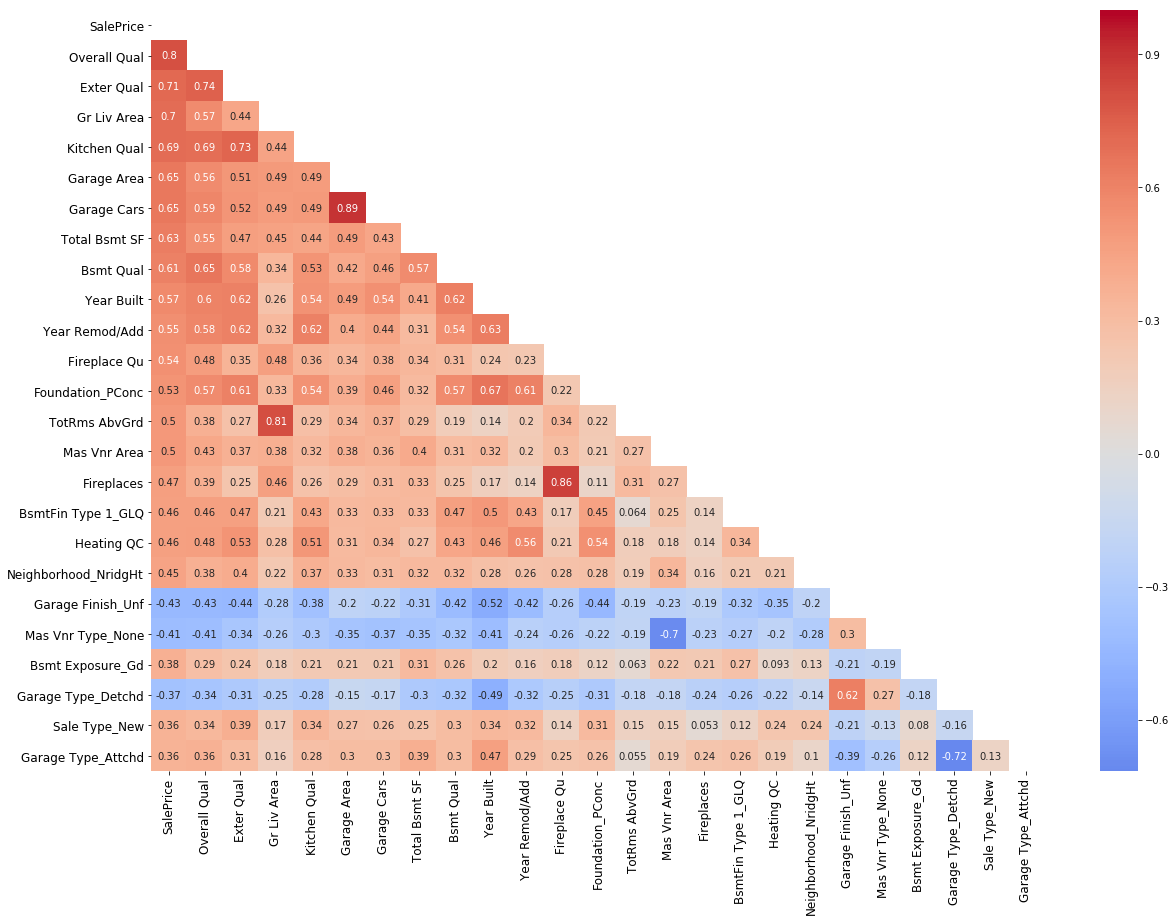

In [2608]:
# Set the default matplotlib figure size
fix, ax = plt.subplots(figsize=(20,14))

# Generate a mask for the upper triangle
mask = np.zeros_like(train_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
ax = sns.heatmap(train_corr, mask=mask, ax=ax,annot=True,center=0,cmap='coolwarm')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)

plt.show()

Text(0, 0.5, 'Sale Price')

<Figure size 432x288 with 0 Axes>

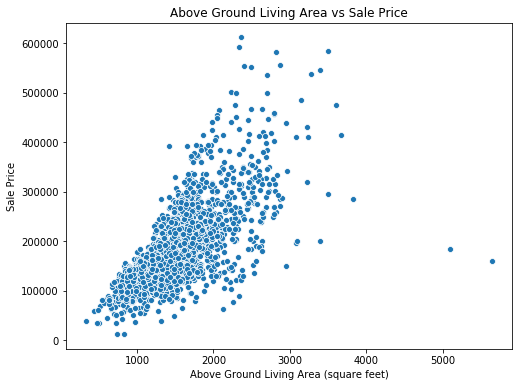

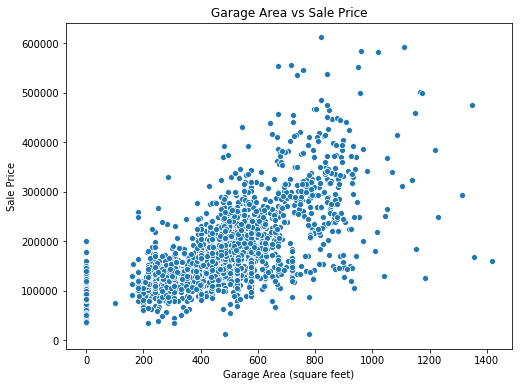

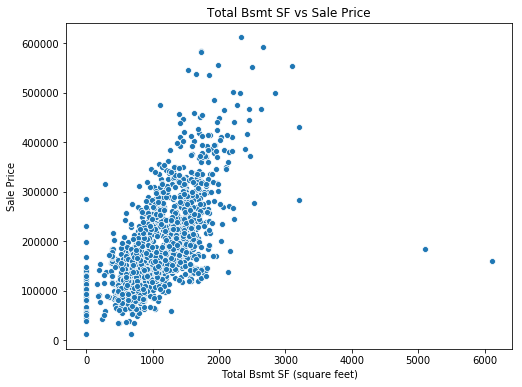

In [2609]:
plt.figure()

# Scatter of Gr Liv Area and SalePrice
fix, ax = plt.subplots(figsize=(8,6))
sns.scatterplot('Gr Liv Area', 'SalePrice', data=train)
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above Ground Living Area (square feet)')
plt.ylabel('Sale Price')

# Scatter of Garage Area and SalePrice
fix, ax = plt.subplots(figsize=(8,6))
sns.scatterplot('Garage Area', 'SalePrice', data=train)
plt.title('Garage Area vs Sale Price')
plt.xlabel('Garage Area (square feet)')
plt.ylabel('Sale Price')

# Scatter of Total Basement Area and SalePrice
fix, ax = plt.subplots(figsize=(8,6))
sns.scatterplot('Total Bsmt SF', 'SalePrice', data=train)
plt.title('Total Bsmt SF vs Sale Price')
plt.xlabel('Total Bsmt SF (square feet)')
plt.ylabel('Sale Price')


In [2610]:
# Remove outliers in Gr Liv Area
train.drop(train[train['Gr Liv Area']>5000].index.values,inplace = True)

In [2611]:
# Remove outliers in Garage Area
train.drop(train[train['Garage Area'] == 0].index.values,inplace = True)

In [2612]:
# Remove outliers in Total Bsmt SF
train.drop(train[train['Total Bsmt SF'] == 0].index.values,inplace = True)
train.drop(train[train['Total Bsmt SF'] > 5000].index.values,inplace = True)

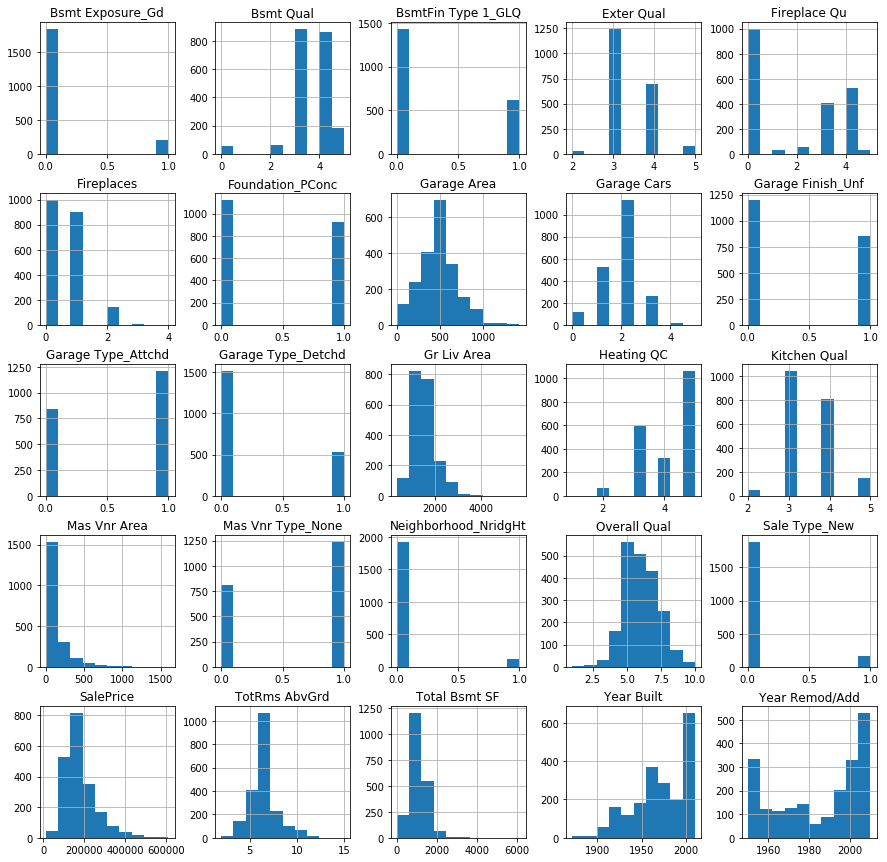

In [2613]:
train_selected.hist(figsize=(15, 15));

In [2614]:
features = [col for col in train_selected._get_numeric_data().columns if col != 'SalePrice']
X = train_selected[features]
y = train_selected['SalePrice']

In [2615]:
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     443.2
Date:                Thu, 06 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:49:35   Log-Likelihood:                -24167.
No. Observations:                2051   AIC:                         4.838e+04
Df Residuals:                    2026   BIC:                         4.852e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.626e+05   1.17e+05     -3.100      0.002   -5.92e+05   -1.33e+05
Overall Qual          1.001e+04    954.253     10.494      0.000    8142.060    1.19e+04
Exter Qual            9693.2017   2180.152      4.446      0.000    5417.627     1.4e+04
Gr Liv Area             37.7362      3.067     12.305      0.000      31.722      43.750
Kitchen Qual          1.265e+04   1732.311      7.300      0.000    9249.061     1.6e+04
Garage Area             30.6026      7.812      3.917      0.000      15.282      45.923
Garage Cars           4595.1444   2262.432      2.031      0.042     158.208    9032.080
Total Bsmt SF           14.5920      2.277      6.408      0.000      10.126      19.058
Bsmt Qual             2788.4248   1232.761      2.262      0.024     370.814    5206.036
Year Built              61.9621     42.980      1.442      0.150     -22.327     146.251
Year Remod/Add          70.5615     51.705      1.365      0.172     -30.838     171.961
Fireplace Qu          1891.7618    834.956      2.266      0.024     254.299    3529.225
Foundation_PConc     -1570.0751   2242.243     -0.700      0.484   -5967.418    2827.268
TotRms AbvGrd         1051.5530    820.525      1.282      0.200    -557.608    2660.714
Mas Vnr Area            41.1251      6.123      6.716      0.000      29.116      53.134
Fireplaces            6495.7180   2302.811      2.821      0.005    1979.593     1.1e+04
BsmtFin Type 1_GLQ    9717.4867   1931.419      5.031      0.000    5929.712    1.35e+04
Heating QC            2180.0832    956.821      2.278      0.023     303.628    4056.539
Neighborhood_NridgHt  2.745e+04   3496.193      7.850      0.000    2.06e+04    3.43e+04
Garage Finish_Unf     -882.8953   2042.186     -0.432      0.666   -4887.900    3122.109
Mas Vnr Type_None     8011.6458   2143.680      3.737      0.000    3807.599    1.22e+04
Bsmt Exposure_Gd      2.755e+04   2624.348     10.497      0.000    2.24e+04    3.27e+04
Garage Type_Detchd   -5218.6232   2923.886     -1.785      0.074    -1.1e+04     515.514
Sale Type_New         1.472e+04   2965.919      4.964      0.000    8906.360    2.05e+04
Garage Type_Attchd    1502.9075   2335.470      0.644      0.520   -3077.266    6083.081
==============================================================================
Omnibus:                     1141.405   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134889.493
Skew:                          -1.644   Prob(JB):                         0.00
Kurtosis:                      42.593   Cond. No.                     5.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condit

In [2616]:
features2 = ['Overall Qual', 'Gr Liv Area',
       'Garage Area', 'Total Bsmt SF', 'Bsmt Qual',
       'Mas Vnr Area', 'Fireplaces', 'BsmtFin Type 1_GLQ',
       'Heating QC', 'Neighborhood_NridgHt',
       'Bsmt Exposure_Gd', 'Garage Type_Detchd',
       'Sale Type_New']
X2 = train_selected[features2]
y2 = train_selected['SalePrice']

In [2617]:
X2 = sm.add_constant(X2)
results = sm.OLS(y2,X2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     751.2
Date:                Thu, 06 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:49:35   Log-Likelihood:                -24244.
No. Observations:                2051   AIC:                         4.852e+04
Df Residuals:                    2037   BIC:                         4.860e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.512e+04   4867.541    -13.379      0.000   -7.47e+04   -5.56e+04
Overall Qual          1.475e+04    874.117     16.874      0.000     1.3e+04    1.65e+04
Gr Liv Area             42.5928      1.971     21.610      0.000      38.727      46.458
Garage Area             50.6226      4.460     11.351      0.000      41.877      59.369
Total Bsmt SF           13.5012      2.240      6.028      0.000       9.109      17.894
Bsmt Qual             4157.9289   1195.809      3.477      0.001    1812.792    6503.066
Mas Vnr Area            27.1608      4.947      5.490      0.000      17.459      36.862
Fireplaces            9813.0908   1336.292      7.344      0.000    7192.450    1.24e+04
BsmtFin Type 1_GLQ    1.306e+04   1918.470      6.805      0.000    9293.511    1.68e+04
Heating QC            5558.0775    892.890      6.225      0.000    3807.004    7309.151
Neighborhood_NridgHt  3.425e+04   3479.108      9.843      0.000    2.74e+04    4.11e+04
Bsmt Exposure_Gd      2.725e+04   2657.493     10.255      0.000     2.2e+04    3.25e+04
Garage Type_Detchd   -8082.6106   1835.518     -4.403      0.000   -1.17e+04   -4482.922
Sale Type_New         2.163e+04   2980.792      7.255      0.000    1.58e+04    2.75e+04
==============================================================================
Omnibus:                     1074.765   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118390.030
Skew:                          -1.498   Prob(JB):                         0.00
Kurtosis:                      40.100   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2618]:
X2 = X2.drop(['const'], axis = 1)

X = X2
y = y2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2619]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

# scale the final test set as well
test = test[features2]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [2620]:
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)

In [2621]:
#checking for the best alpha value in Ridge
ridge = Ridge()
parameters = {'alpha':range(1, 1000)}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 99}
-1254815676.7654393


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [2622]:
ridge = RidgeCV(alphas=[99])

In [2623]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.7960004178288946

In [2624]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

0.7950013715567888

In [2625]:
ridge_scores = cross_val_score(ridge, X_train, y_train,cv=5)
ridge_scores.mean()

0.7971850525355882

In [2626]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([99]), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [2627]:
ridge.score(X_train, y_train)

0.8138155856309838

In [2628]:
ridge.score(X_test, y_test)

0.8645103453455522

In [2629]:
# calculate RMSE for test set

y_hat = ridge.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_hat))

28842.847125060238

In [2634]:
# calculate RMSE for train set

y_hat = ridge.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_hat))

34315.11466658747

In [2630]:
predicted_price = ridge.predict(test)

In [2631]:
pd.DataFrame(data=predicted_price).head()

,0
0,4.939510e+07
1,5.601909e+07
2,3.873232e+07
3,2.979912e+07
4,4.221617e+07


In [2632]:
final_test['SalePrice'] = pd.DataFrame(data=predicted_price)

output = final_test[['Id','SalePrice']].sort_values(by=['Id'])

In [2633]:
pd.DataFrame(data=output).to_csv('sub_reg.csv',index=False)